In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import svm


In [4]:
#loading the dataset
df=pd.read_csv('/content/Sales.csv')
df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Purchase_DAY,Purchase_MONTH,Purchase_YEAR
0,504308,53,0,45.3,2,22/06/2021,24.915,1,885,0,0,0,22,6,2021
1,504309,18,1,36.2,3,10/12/2021,2.896,2,656,0,0,1,10,12,2021
2,504310,52,1,10.6,1,14/03/2021,10.600,0,761,0,1,0,14,3,2021
3,504311,29,0,54.1,5,25/10/2021,43.280,1,906,0,1,0,25,10,2021
4,504312,21,1,56.9,1,14/09/2021,56.900,1,605,0,1,0,14,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15/02/2021,6.213,1,894,0,0,0,15,2,2021
65792,570100,33,0,29.3,1,05/02/2021,29.300,0,722,0,0,0,5,2,2021
65793,570101,50,0,25.4,5,29/10/2021,23.114,3,424,0,0,0,29,10,2021
65794,570102,56,0,29.2,1,09/12/2021,29.200,3,731,0,0,0,9,12,2021


In [5]:
df.describe(include=[np.integer])

,Customer_id,Age,Gender,N_Purchases,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Purchase_DAY,Purchase_MONTH,Purchase_YEAR
count,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,537205.500000,39.592696,0.671348,3.992477,1.308651,598.925603,0.630935,0.151027,0.250258,15.711259,6.531415,2021.002690
std,18993.813493,13.825466,0.469727,2.004370,1.081959,277.833635,0.996407,0.358078,0.433165,8.808250,3.459452,0.051797
min,504308.000000,16.000000,0.000000,1.000000,0.000000,120.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2021.000000
25%,520756.750000,28.000000,0.000000,2.000000,0.000000,358.000000,0.000000,0.000000,0.000000,8.000000,4.000000,2021.000000
50%,537205.500000,40.000000,1.000000,4.000000,1.000000,598.000000,0.000000,0.000000,0.000000,16.000000,7.000000,2021.000000
75%,553654.250000,51.000000,1.000000,6.000000,2.000000,840.000000,1.000000,0.000000,1.000000,23.000000,10.000000,2021.000000
max,570103.000000,63.000000,1.000000,7.000000,3.000000,1080.000000,3.000000,1.000000,1.000000,31.000000,12.000000,2022.000000


In [6]:
pd.to_datetime(df['Purchase_DATE']).dt.day

<ipython-input-6-0240a4f03fc0>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime(df['Purchase_DATE']).dt.day


0        22
1        12
2        14
3        25
4        14
         ..
65791    15
65792     2
65793    29
65794    12
65795    23
Name: Purchase_DATE, Length: 65796, dtype: int64

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

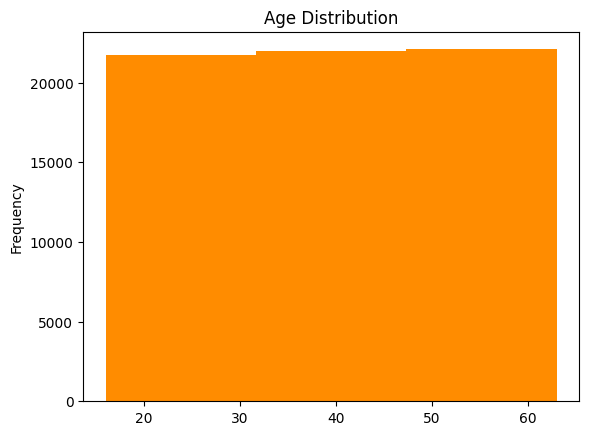

In [7]:
df['Age'].plot(kind='hist',title='Age Distribution',bins=3,xlabel='Age Distribution',color=['darkorange', 'gold', 'sandybrown'])

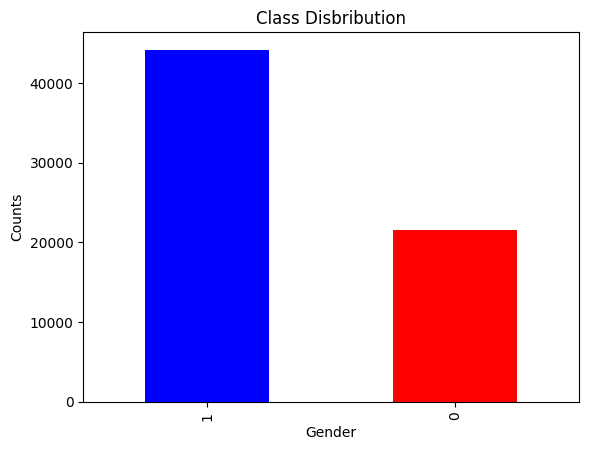

In [8]:
df['Gender'].value_counts().plot(kind='bar',title='Class Disbribution',xlabel='Gender',ylabel='Counts',color=['b','r'])
plt.show()

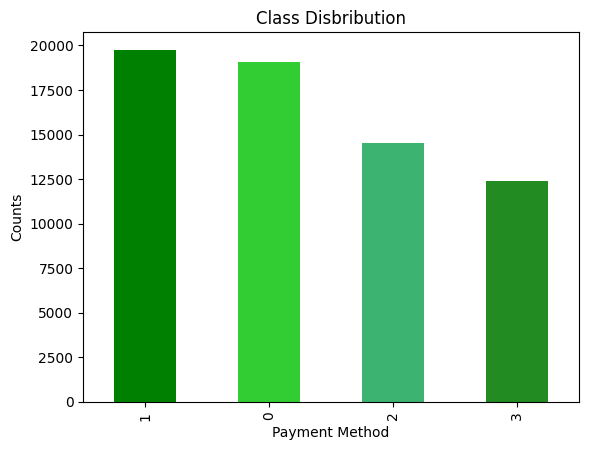

In [9]:
df['Pay_Method'].value_counts().plot(kind='bar',title='Class Disbribution',xlabel='Payment Method',ylabel='Counts',color=['green', 'limegreen', 'mediumseagreen', 'forestgreen'])
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
 12  Purchase_DAY    65796 non-null  int64  
 13  Purchase_MONTH  65796 non-null  int64  
 14  Purchase_YEAR   65796 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 7.5+ MB


<ipython-input-11-ddb581242a1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


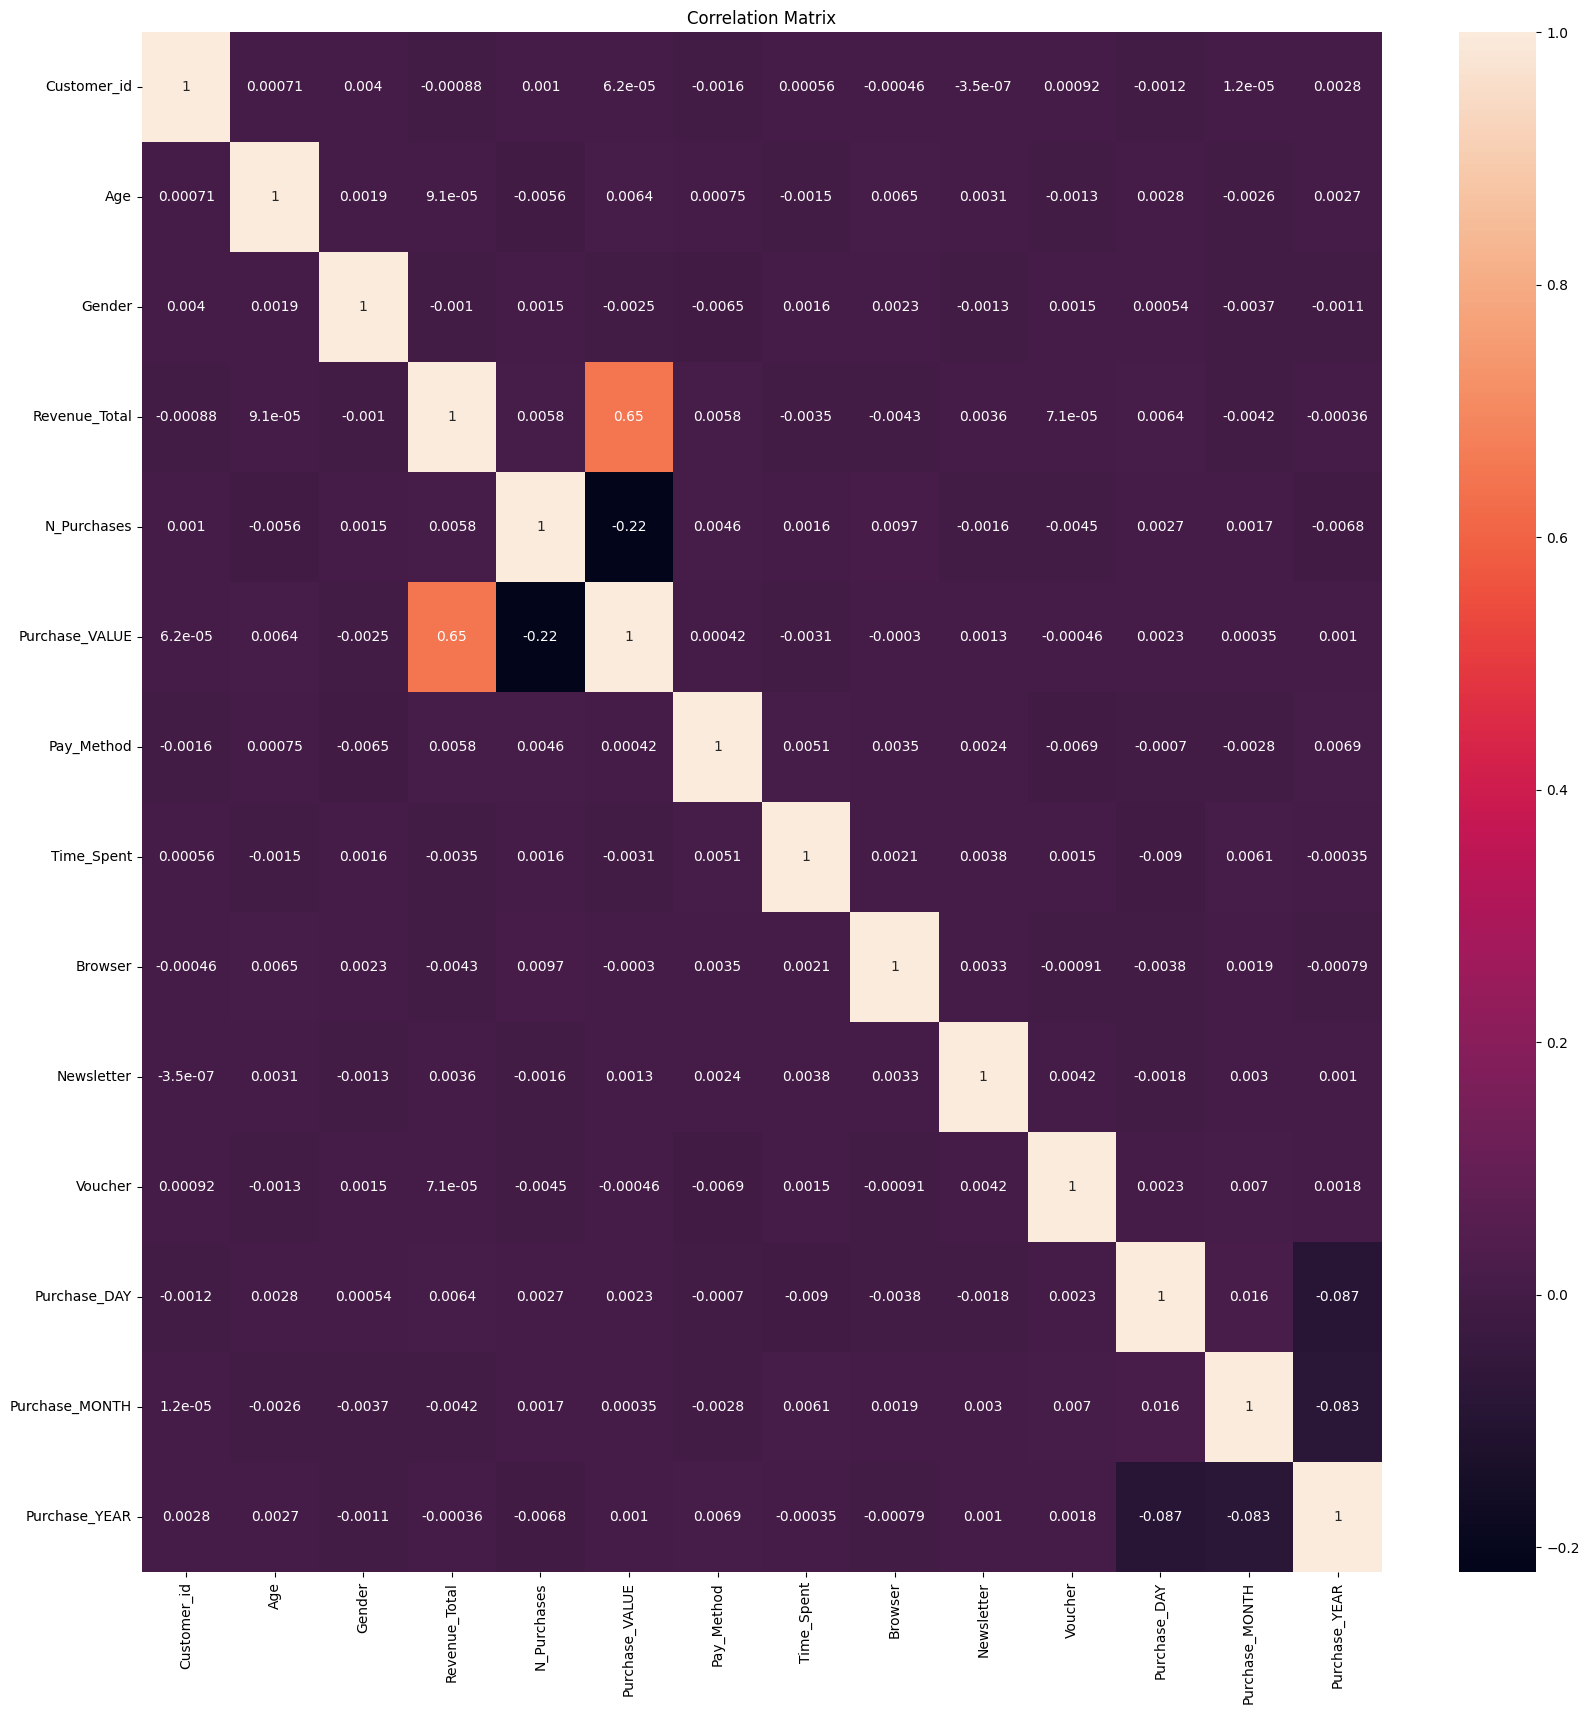

In [11]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [12]:
df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Purchase_DAY,Purchase_MONTH,Purchase_YEAR
0,504308,53,0,45.3,2,22/06/2021,24.915,1,885,0,0,0,22,6,2021
1,504309,18,1,36.2,3,10/12/2021,2.896,2,656,0,0,1,10,12,2021
2,504310,52,1,10.6,1,14/03/2021,10.600,0,761,0,1,0,14,3,2021
3,504311,29,0,54.1,5,25/10/2021,43.280,1,906,0,1,0,25,10,2021
4,504312,21,1,56.9,1,14/09/2021,56.900,1,605,0,1,0,14,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15/02/2021,6.213,1,894,0,0,0,15,2,2021
65792,570100,33,0,29.3,1,05/02/2021,29.300,0,722,0,0,0,5,2,2021
65793,570101,50,0,25.4,5,29/10/2021,23.114,3,424,0,0,0,29,10,2021
65794,570102,56,0,29.2,1,09/12/2021,29.200,3,731,0,0,0,9,12,2021


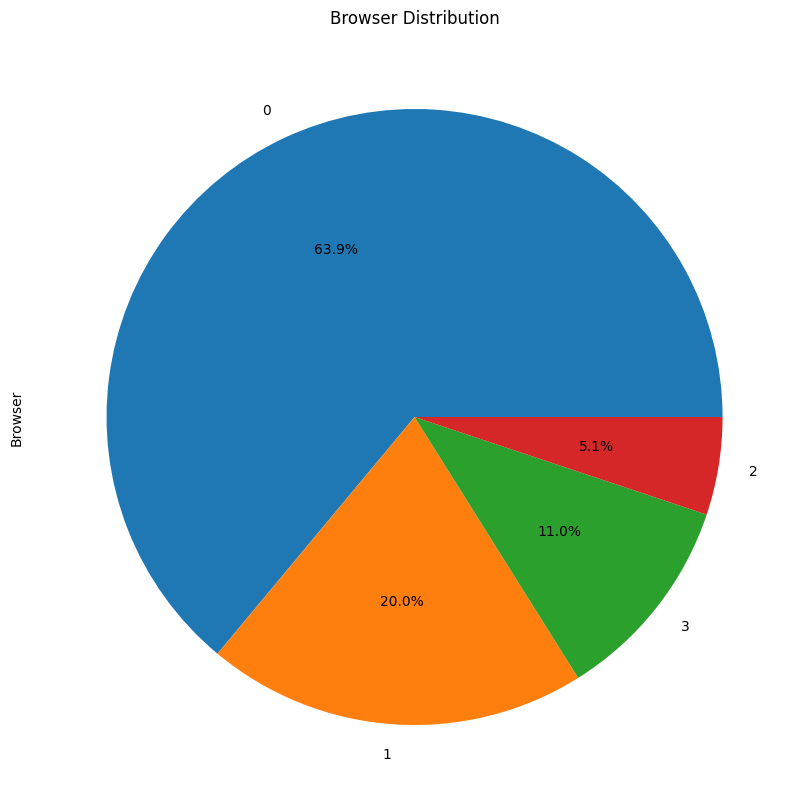

In [13]:
plt.figure(figsize=(20,10))
df['Browser'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='Browser Distribution')
plt.show()

# Trying to Predicting the Pay_Method based on given features

In [14]:
df=df.drop('Purchase_DAY',axis=1)
df=df.drop('Purchase_MONTH',axis=1)
df=df.drop('Purchase_YEAR',axis=1)
df


,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22/06/2021,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10/12/2021,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14/03/2021,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25/10/2021,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14/09/2021,56.900,1,605,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15/02/2021,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,05/02/2021,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,29/10/2021,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09/12/2021,29.200,3,731,0,0,0


In [15]:
def preprocess_input(df,scaler):
    df=df.copy()
    df=df.drop('Customer_id',axis=1)
    df['Purchase_year']=pd.to_datetime(df['Purchase_DATE']).dt.year.astype(np.int)
    df['Purchase_month']=pd.to_datetime(df['Purchase_DATE']).dt.month.astype(np.int)
    df['Purchase_day']=pd.to_datetime(df['Purchase_DATE']).dt.day.astype(np.int)
    df=df.drop('Purchase_DATE',axis=1)
    y=df['Gender']
    x=df.drop('Gender',axis=1)
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9)
    scaler.fit(x_train)

    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    return x_train,x_test,y_train,y_test

In [16]:
x_train,x_test,y_train,y_test=preprocess_input(df,MinMaxScaler())
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(59216, 12)
(6580, 12)
(59216,)
(6580,)


<ipython-input-15-effe6a194fa5>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Purchase_year']=pd.to_datetime(df['Purchase_DATE']).dt.year.astype(np.int)
<ipython-input-15-effe6a194fa5>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Purchase_year']=pd.to_datetime(df['Purchase_DATE']).dt.year.astype(np.int)
<ipython-input-15-effe6a194fa5>:5: UserWarning: Parsing dates in DD/MM/YYYY format whe

# Training the Model

In [17]:
models={
    "Random Forest Classifier":RandomForestClassifier(n_estimators = 100),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=2),
}


Random Forest Classifier 0.6662613981762918
Confusion matrix

 [[  50 2116]
 [  80 4334]]
Decision Tree Classifier 0.544224924012158
Confusion matrix

 [[ 738 1428]
 [1571 2843]]

KNN 0.48632218844984804
Confusion matrix

 [[1218  948]
 [2432 1982]]


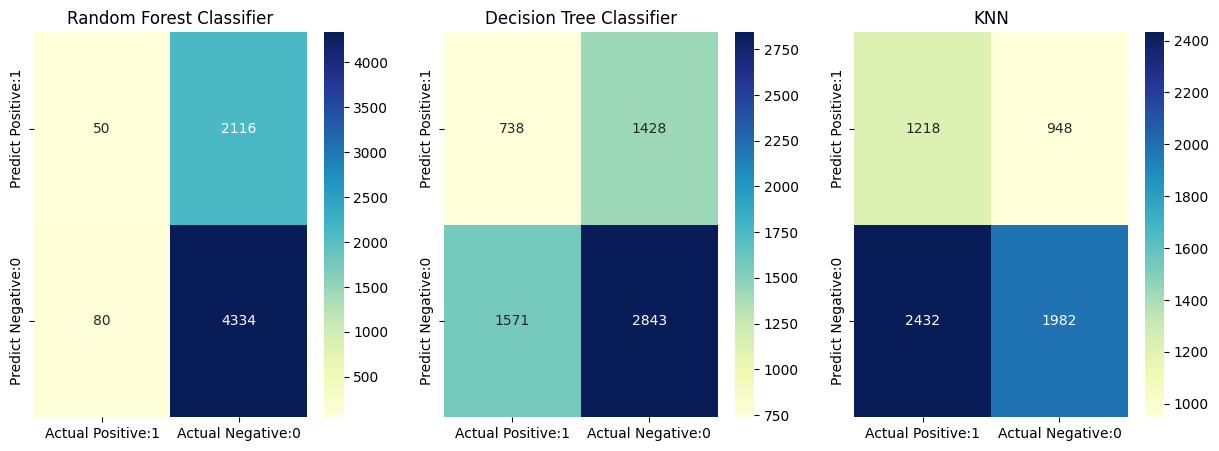

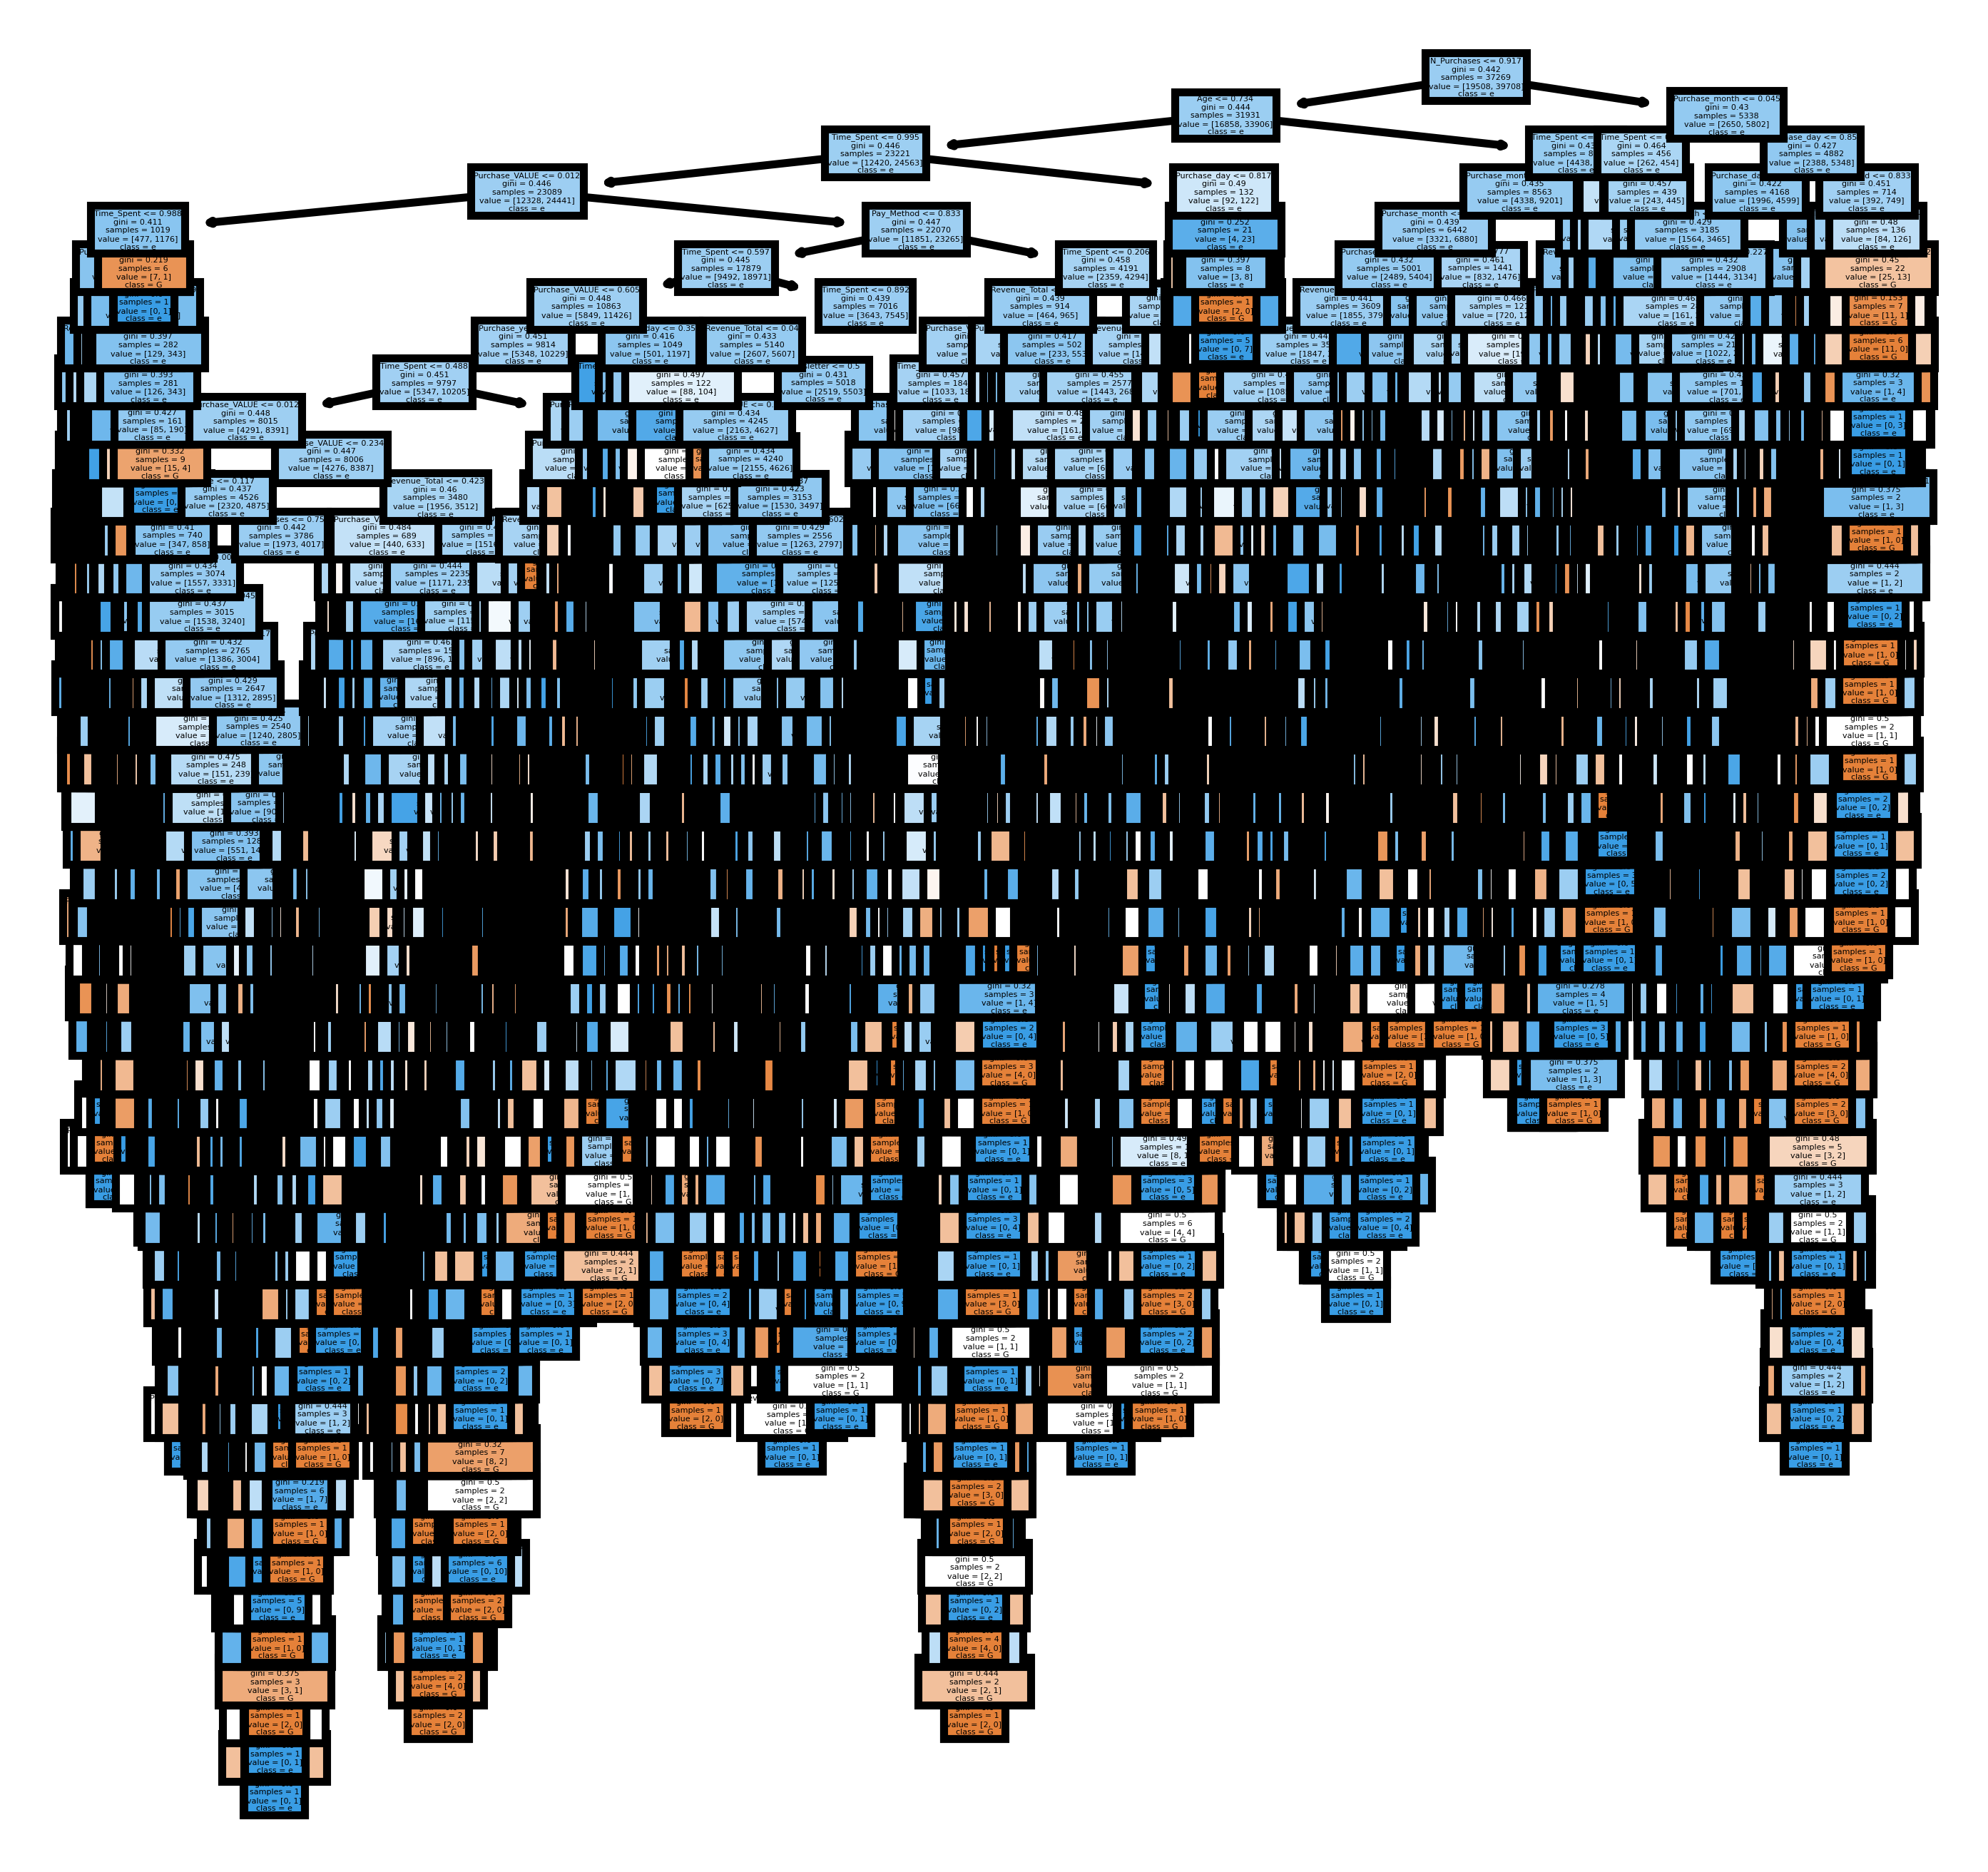

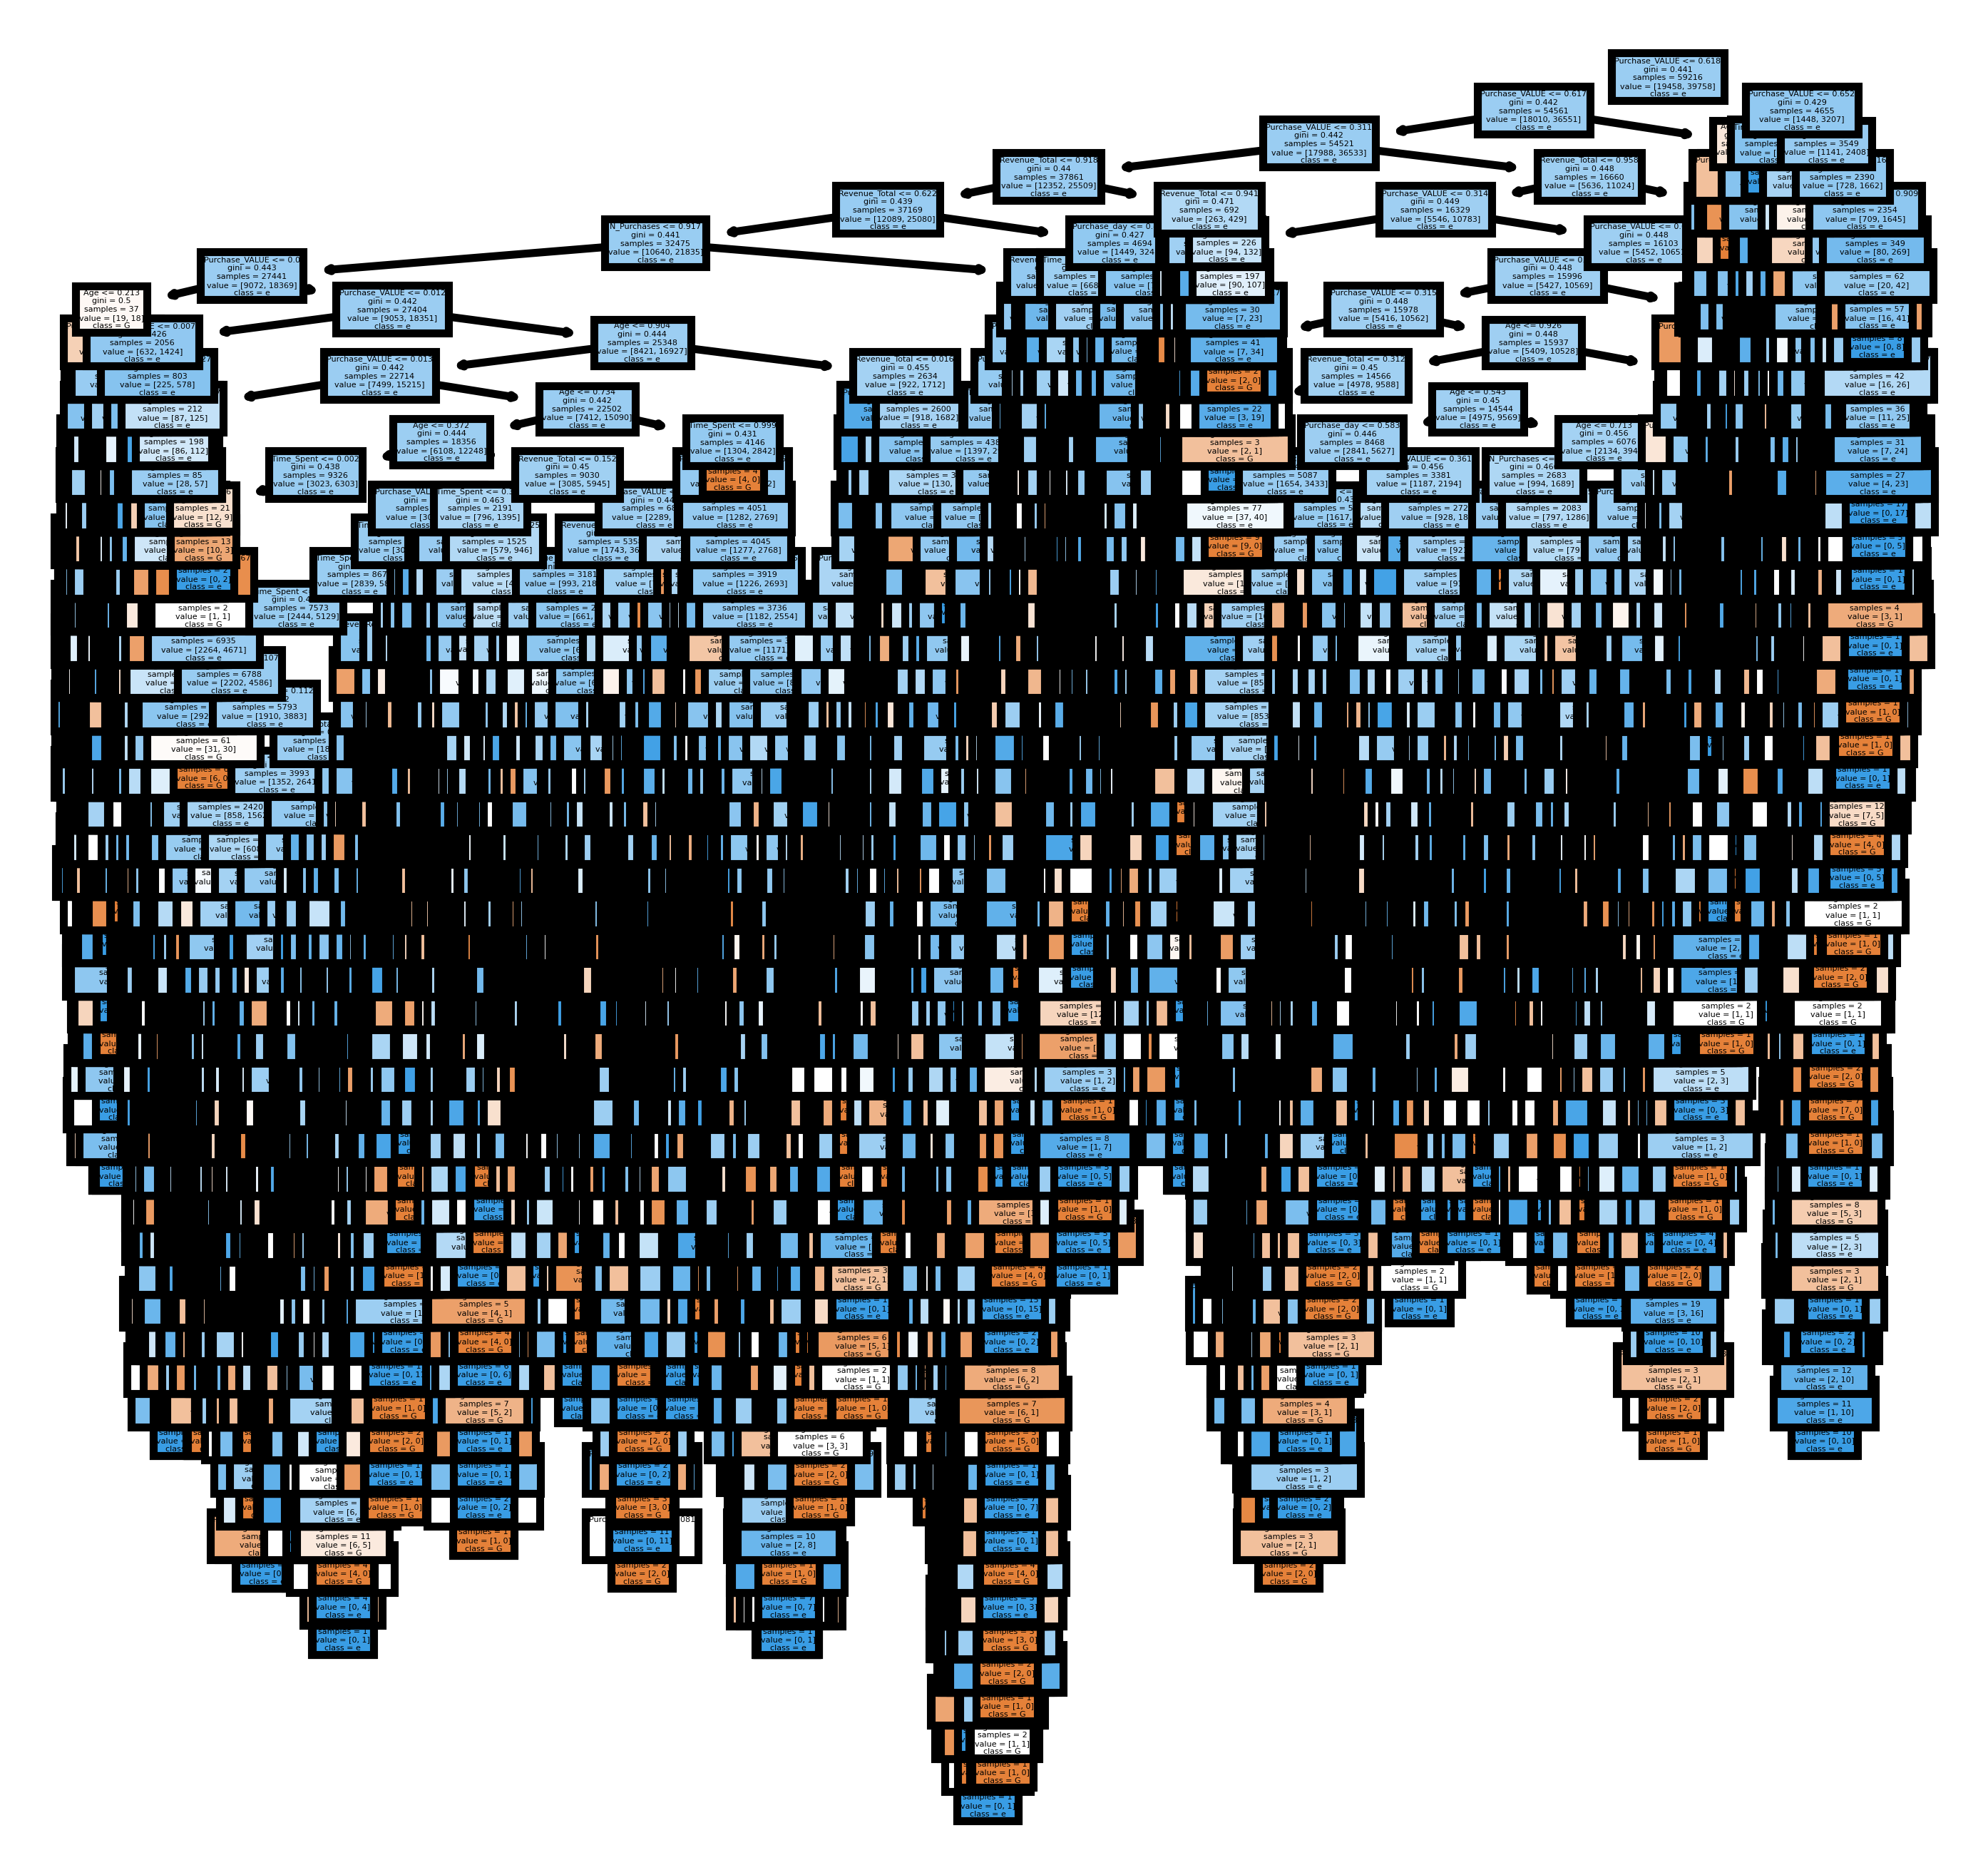

In [18]:
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
from sklearn import tree

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots(1, 3, figsize=(15,5))
i = 0
for name,model in models.items():
    ax[i].set_title(name)
    model.fit(x_train,y_train)
    if(name == 'Random Forest Classifier'):
        print('')
        fn=x_train.columns
        cn='Gender'
        fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
        tree.plot_tree(model.estimators_[0],
                      feature_names = fn,
                      class_names=cn,
                      filled = True);
        fig.savefig('rf_individualtree.png')
    if(name == 'Decision Tree Classifier'):
        fn=x_train.columns
        cn='Gender'
        fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
        tree.plot_tree(model,
                      feature_names = fn,
                      class_names=cn,
                      filled = True);
        fig.savefig('dct_individualtree.png')
    if(name == 'KNN'):
        print('')
    print(name,model.score(x_test,y_test))
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)

    print('Confusion matrix\n\n', cm)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu', ax=ax[i])
    i = i + 1